### Import des packages

In [3]:
import json 
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score



### Chargement des données

In [2]:
with open('ai_pub_samp.json','r') as f:
  data = json.load(f)

### Extraction des titres et des catégories

In [3]:
# mettre le titre en minuscule dans la variable X_title
X_title = [x['title'].lower() for x in data]
# extraire et mettre en miniscules l'abstract dans la variable X_abstract
X_abstract = [x['abstract'].lower() for x in data]
# mettre la catégorie (1e élément de la liste) dans la variable Y
Y = [x['categories'][0] for x in data]

### Répartition des catégories / nombre d'articles par categories

In [5]:
y_df = pd.Series(Y)

y_df.value_counts()[:10]

MULTIDISCIPLINARY SCIENCES                       1886
UROLOGY & NEPHROLOGY                              674
RADIOLOGY, NUCLEAR MEDICINE & MEDICAL IMAGING     646
ENGINEERING, BIOMEDICAL                           641
SURGERY                                           610
NEUROSCIENCES                                     526
MATHEMATICAL & COMPUTATIONAL BIOLOGY              372
BIOCHEMISTRY & MOLECULAR BIOLOGY                  344
COMPUTER SCIENCE, ARTIFICIAL INTELLIGENCE         289
GENETICS & HEREDITY                               245
dtype: int64

In [6]:
# nombre des categories
output = []
for x in Y:
    if x not in output:
        output.append(x)
len(output)


97

In [6]:
from collections import Counter
cpt = Counter(Y)


<BarContainer object of 97 artists>

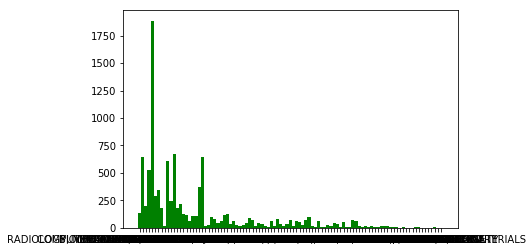

In [8]:
plt.bar(cpt.keys(), cpt.values(), width=1, color='g')

# Preprocessing
## Elimination des classes non fréquentes ( n < 2 )

In [10]:
y_counts = y_df.value_counts()
y_counts[y_counts < 2]


SOCIAL WORK                 1
STATISTICS & PROBABILITY    1
ENTOMOLOGY                  1
MEDICAL ETHICS              1
MATHEMATICS, APPLIED        1
HORTICULTURE                1
dtype: int64

In [15]:
discarded_labels = y_counts[y_counts < 2].index.tolist()

In [ ]:
discarding_mask = [y in discarded_labels for y in Y]

In [37]:
Y_kept = [y for y in Y if y not in discarded_labels]
Y_discarded = [y for y in Y if y in discarded_labels]
len(Y_kept), len(Y_discarded), len(Y)

(9994, 6, 10000)

In [33]:
X_title_kept = [X_title[i] for i in range(len(X_title)) if not discarding_mask[i]]
X_title_discarded = [X_title[i] for i in range(len(X_title)) if  discarding_mask[i]]
len(X_title_kept), len(X_title_discarded), len(X_title)

(9994, 6, 10000)

In [34]:
X_abstract_kept = [X_abstract[i] for i in range(len(X_abstract)) if not discarding_mask[i]]
X_abstract_discarded = [X_abstract[i] for i in range(len(X_abstract)) if  discarding_mask[i]]
len(X_abstract_kept), len(X_abstract_discarded), len(X_abstract)

(9994, 6, 10000)

### Décomposer les données en train et test

### titre uniquement

In [30]:
!mkdir -p data/title_only

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X_title_kept, Y_kept, test_size=0.1995, random_state=0, stratify=Y_kept)
x_test = x_test + X_title_discarded
y_test = y_test + Y_discarded
len (x_train), len (y_train), len(x_test), len (y_test)

(8000, 8000, 2000, 2000)

In [56]:
pd.DataFrame({
    'title': x_train,
    'label': y_train
}).to_csv("data/title_only/train.csv", index=False)

In [57]:
pd.DataFrame({
    'title': x_test,
    'label': y_test
}).to_csv("data/title_only/test.csv", index=False)

### Abstract uniquement

In [58]:
data_dir = "data/abstract_only"
!mkdir -p $data_dir

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X_abstract_kept, Y_kept, test_size=0.1995, random_state=0, stratify=Y_kept)
x_test = x_test + X_title_discarded
y_test = y_test + Y_discarded
len (x_train), len (y_train), len(x_test), len (y_test)

(8000, 8000, 2000, 2000)

In [60]:
pd.DataFrame({
    'abstract': x_train,
    'label': y_train
}).to_csv(f"{data_dir}/train.csv", index=False)

In [61]:
pd.DataFrame({
    'abstract': x_test,
    'label': y_test
}).to_csv(f"{data_dir}/test.csv", index=False)

### Title et abstract ensemble

In [62]:
data_dir = "data/abstract_title"
!mkdir -p $data_dir

In [76]:
x_kept = pd.DataFrame({
    'title': X_title_kept,
    'abstract': X_abstract_kept
})
x_discarded = pd.DataFrame({
    'title': X_title_discarded,
    'abstract': X_abstract_discarded
})
x_discarded

,title,abstract
0,mode decomposition evolution equations.,partial differential equation (pde) based meth...
1,children under fire: the role of the schools.,responses of teachers and children in northern...
2,predicting lettuce canopy photosynthesis with ...,an artificial neural network (nn) and a statis...
3,modeling persistent trends in distributions.,we present a nonparametric framework to model ...
4,"""involving interface"": an extended mind theore...","in 2008 the authors held ""involving interface,..."
5,insect walking and robotics.,with the advent of significant collaborations ...


In [84]:
x_discarded.values.shape

(6, 2)

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x_kept.values, Y_kept, test_size=0.1995, random_state=0, stratify=Y_kept)
x_test = np.vstack([x_test, x_discarded.values])
y_test = y_test + Y_discarded
len (x_train), len (y_train), len(x_test), len (y_test)

(8000, 8000, 2000, 2000)

In [93]:
save_df = pd.DataFrame(x_train, columns=['title', 'abstract'])
save_df['label'] = y_train
save_df.to_csv(f"{data_dir}/train.csv", index=False)
save_df.head()

,title,abstract,label
0,an improved kernel based extreme learning mach...,robot execution failures prediction (classific...,MULTIDISCIPLINARY SCIENCES
1,experimental tests of a neural-network model f...,spontaneous sinusoidal oscillations of the eye...,NEUROSCIENCES
2,decision making in concurrent multitasking: do...,while multitasking has received a great deal o...,MULTIDISCIPLINARY SCIENCES
3,applicability of vi in arid vegetation delinea...,"gdvi(3), gdvi(2), ndvi, msavi and savi were ev...",ENVIRONMENTAL SCIENCES
4,an evaluation of multiple feed-forward network...,the graphics processing unit (gpu) originally ...,"COMPUTER SCIENCE, ARTIFICIAL INTELLIGENCE"


In [95]:
save_df = pd.DataFrame(x_test, columns=['title', 'abstract'])
save_df['label'] = y_test
save_df.to_csv(f"{data_dir}/test.csv", index=False)
save_df.head()

,title,abstract,label
0,tracking evolving communities in large linked ...,we are interested in tracking changes in large...,MULTIDISCIPLINARY SCIENCES
1,influences on the quality of student learning-...,this paper reviews recent research into the wa...,"MEDICINE, GENERAL & INTERNAL"
2,the local geometry of multiattribute tradeoff ...,existing representations for multiattribute ce...,"COMPUTER SCIENCE, ARTIFICIAL INTELLIGENCE"
3,forest fire risk assessment-an integrated appr...,the present study deals with application of th...,ENVIRONMENTAL SCIENCES
4,a fully automated method for quantifying and l...,"white matter hyperintensities (wmh), commonly ...",PSYCHIATRY


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X_title, 
                                                    Y, 
                                                    test_size=0.2, 
                                                    random_state=42)
len (x_train), len (y_train), len(x_test), len (y_test) 


(8000, 8000, 2000, 2000)

In [24]:
# creer un mapping cat_2_id

# creer un reverse mapping id_2_cat

# calculer la taille du vocabulaire cat_vocab

# preprocesser les X_train et X_test en X_train_id et X_test_id

def create_vocab(dt): 
  to_id = {'<PAD>': 0, '<UNK>':1}

  for sent in dt:
    for w in sent: 
      if w not in to_id.keys():
        to_id[w] = len(to_id)

  from_id = {v: k for k, v in to_id.items()}

  vocab = len(to_id.keys())

  return to_id, from_id, vocab

def preprocess_Y(Y, cat_to_id): 
  res = []
  for ex in Y: 
    if ex not in cat_to_id.keys():
      res.append(cat_to_id['<UNK>'])
    else:
      res.append(cat_to_id[ex])
  return np.array(res)

In [25]:
cat_to_id, cat_from_id, cat_vocab = create_vocab([y_train])
y_train_id = preprocess_Y(y_train, cat_to_id)
y_test_id = preprocess_Y(y_test, cat_to_id)

In [26]:
# Créer le tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)

# Entrainer le tokenizer sur le train set 
tokenizer.fit_on_texts(x_train)

# Transformer les textes en vecteurs numeriques à l'aide du tokenizer
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq =  tokenizer.texts_to_sequences(x_test)

#faire un padding
x_train_seq = tf.keras.preprocessing.sequence.pad_sequences(x_train_seq, maxlen = 40, truncating='post')
x_test_seq = tf.keras.preprocessing.sequence.pad_sequences(x_test_seq, maxlen = 40, truncating='post')